In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from sklearn.manifold import MDS
from tensorflow.keras import models

from keras.utils import to_categorical

In [3]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model, Sequential
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

In [4]:
def load_fashion_mnist_from_csv(train_csv_path, test_csv_path):
    # Load training data
    train_df = pd.read_csv(train_csv_path)
    train_labels = train_df['label'].values
    train_pixels = train_df.drop('label', axis=1).values.reshape(-1,784)

    # Load test data
    test_df = pd.read_csv(test_csv_path)
    test_labels = test_df['label'].values
    test_pixels = test_df.drop('label', axis=1).values.reshape(-1,784)

    return (train_pixels, train_labels), (test_pixels, test_labels)


In [5]:
(train, train_label), (test, test_label) = load_fashion_mnist_from_csv('fashion-mnist_train.csv', 'fashion-mnist_test.csv')

In [6]:
print(train.shape)

(60000, 784)


In [7]:
num_samples = 5000
idx = np.random.choice(train.shape[0], num_samples, replace=False)
subset_train = train[idx]
subset_train_labels = train_label[idx]

In [8]:
print(subset_train.shape)

(5000, 784)


In [9]:
subset_train_reshaped = subset_train.reshape(-1, 784)

In [10]:
subset_train_reshaped.shape

(5000, 784)

In [22]:
# Apply MDS
embedding = MDS(n_components=2)
train_transformed = embedding.fit_transform(subset_train_reshaped)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


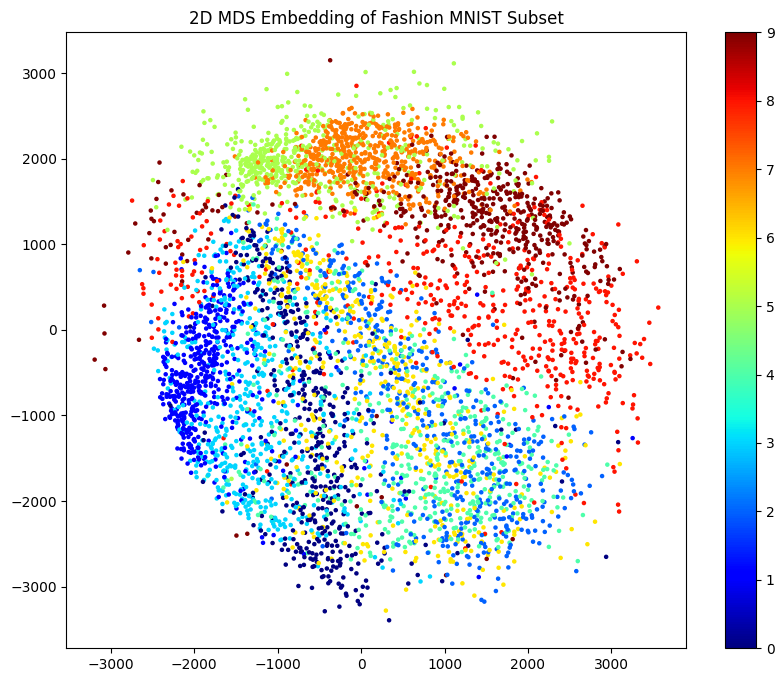

In [24]:
plt.figure(figsize=(10, 8))
plt.scatter(train_transformed[:, 0], train_transformed[:, 1], c=subset_train_labels, cmap='jet', s=5)
plt.colorbar()
plt.title("2D MDS Embedding of Fashion MNIST Subset")
plt.show()

In [39]:
for metric_value in metrics:
    for eps in eps_values:
        embedding = MDS(n_components=2, metric=metric_value, eps=eps)
        train_transformed = embedding.fit_transform(subset_train_reshaped)
        embeddings[(metric_value, eps)] = train_transformed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: Fu

In [52]:
for key, value in embeddings.items():
    metric_val, eps = key
    filename = f"embedding_metric_{metric_val}_eps_{eps}.npy"
    np.save(filename, value) # the output already save to the file

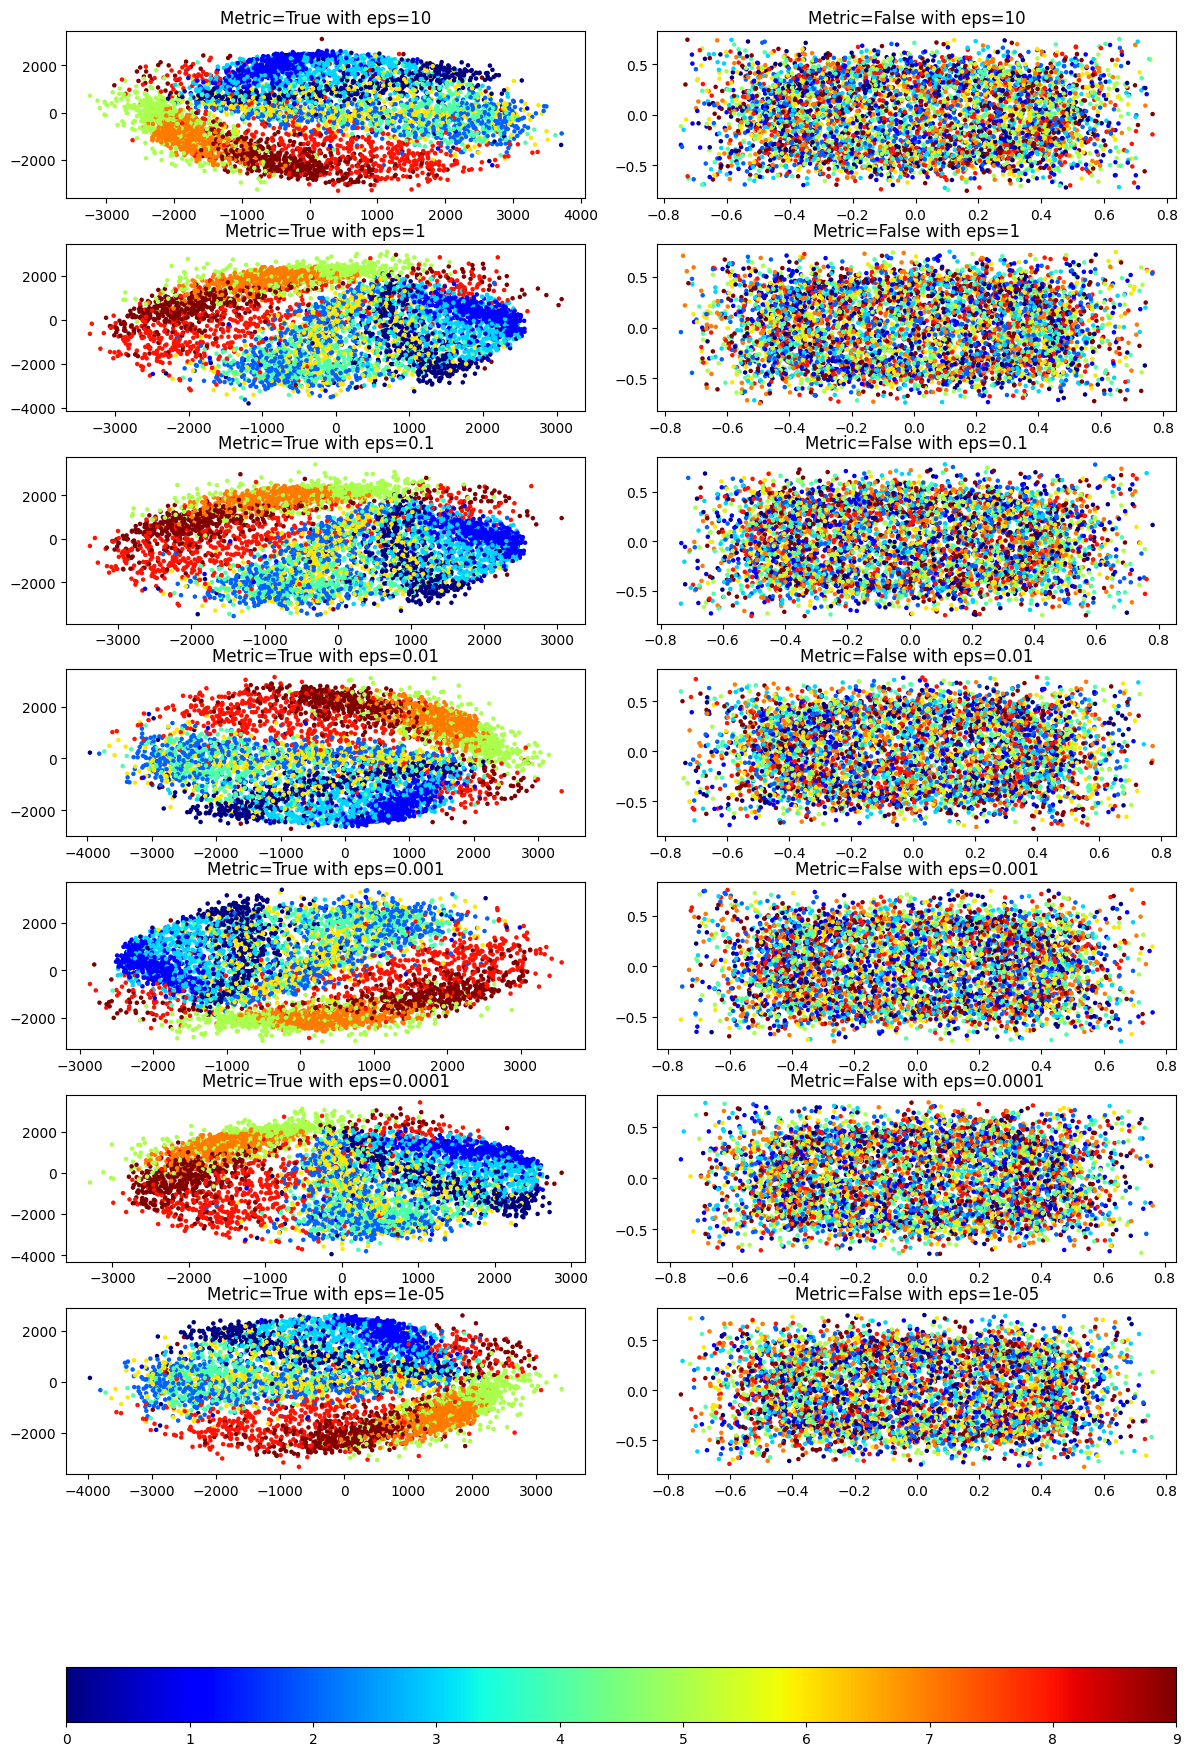

In [42]:
fig, axes = plt.subplots(nrows=len(eps_values), ncols=len(metrics), figsize=(12, 20))

for j, eps in enumerate(eps_values):
    for i, metric_val in enumerate(metrics):
        data = embeddings[(metric_val, eps)]
        ax = axes[j, i]
        sc = ax.scatter(data[:, 0], data[:, 1], c=subset_train_labels, cmap='jet', s=5)
        metric_str = "Metric=True" if metric_val else "Metric=False"
        ax.set_title(f'{metric_str} with eps={eps}')

plt.tight_layout()
plt.colorbar(sc, ax=axes.ravel().tolist(), orientation='horizontal', pad=0.1)
plt.show()

In [26]:
subset_train_2D = subset_train.reshape(-1, 784)

embedding = MDS(n_components=3)
train_transformed_3D = embedding.fit_transform(subset_train_2D)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [43]:
np.save("train_transformed_3D.npy", train_transformed_3D)

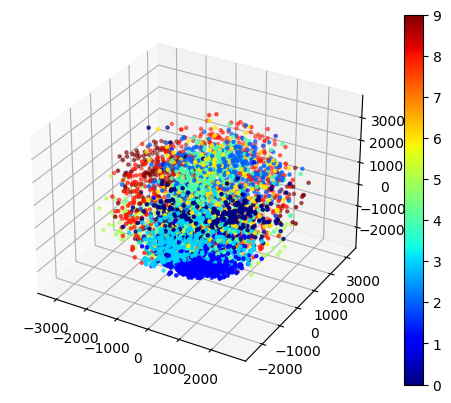

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(train_transformed_3D[:, 0], train_transformed_3D[:, 1], train_transformed_3D[:, 2], c=subset_train_labels, cmap='jet', s=5)
plt.colorbar(scatter)
plt.show()

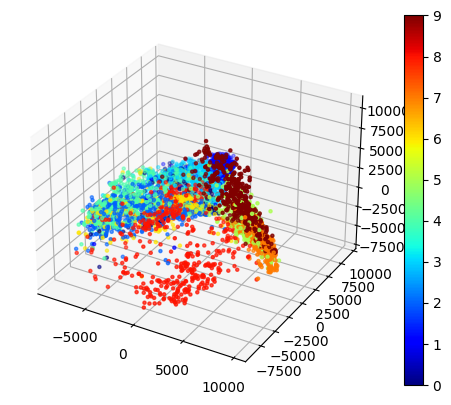

In [31]:
from sklearn.manifold import Isomap

iso_embedding = Isomap(n_components=3)
train_iso_transformed = iso_embedding.fit_transform(subset_train_2D)

# Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(train_iso_transformed[:, 0], train_iso_transformed[:, 1], train_iso_transformed[:, 2], c=subset_train_labels, cmap='jet', s=5)
plt.colorbar(scatter)
plt.show()

In [11]:
from sklearn.manifold import Isomap
from mpl_toolkits.mplot3d import Axes3D

In [23]:
subset_train = train[:500]
subset_train_labels = train_label[:500]

n_neighbors_values = [10, 20, 30, 40]
n_components_values = [1, 2, 3]

In [25]:
subset_train.shape

(500, 784)

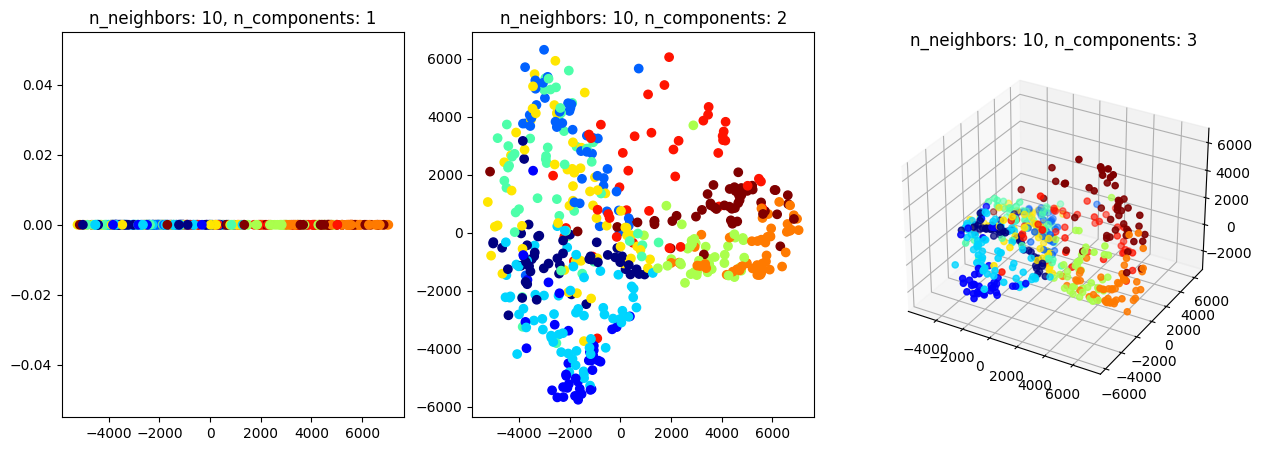

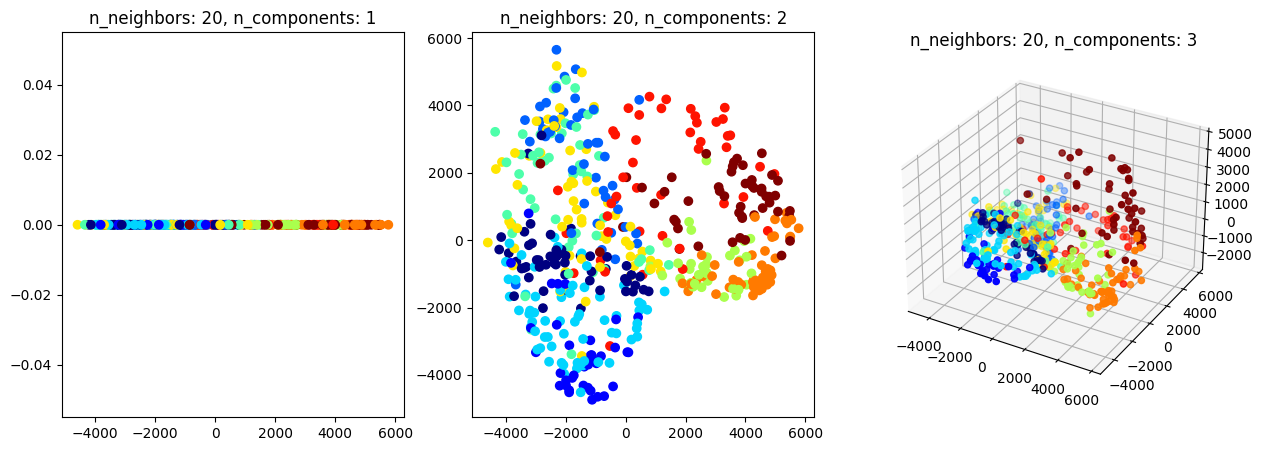

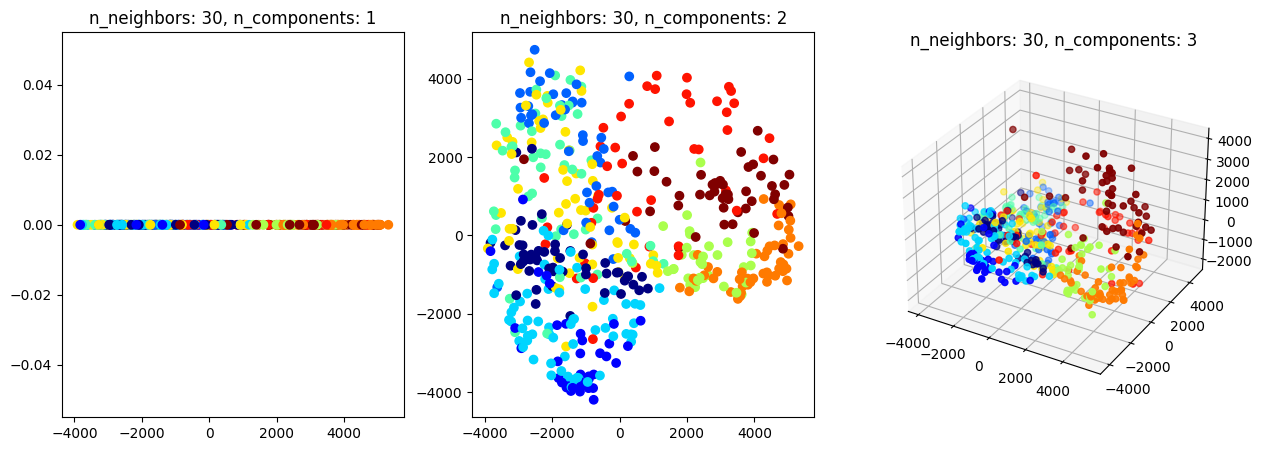

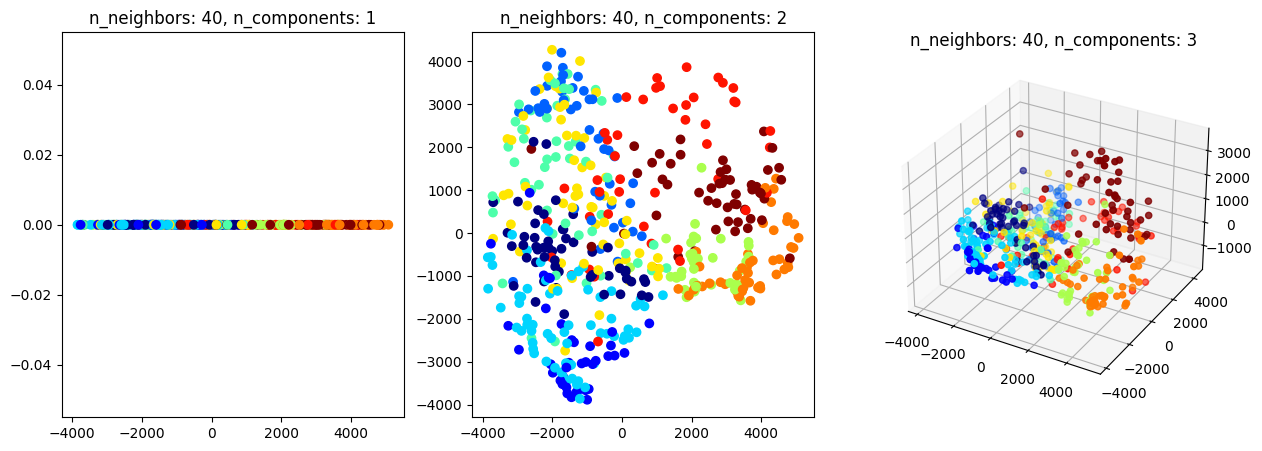

In [13]:
transformed_isomap_data_list = []

for n_neighbors_val in n_neighbors_values:
    plt.figure(figsize=(15, 5))
    for i, n_components_val in enumerate(n_components_values):
        
        # Isomap
        isomap = Isomap(n_neighbors=n_neighbors_val, n_components=n_components_val)
        transformed_isomap_data = isomap.fit_transform(subset_train)
        transformed_isomap_data_list.append((n_neighbors_val, n_components_val, transformed_isomap_data))
        
        if n_components_val == 1:
            ax = plt.subplot(1, len(n_components_values), i + 1)
            plt.scatter(transformed_isomap_data, np.zeros_like(transformed_isomap_data), c=subset_train_labels, cmap='jet')
        elif n_components_val == 2:
            ax = plt.subplot(1, len(n_components_values), i + 1)
            plt.scatter(transformed_isomap_data[:, 0], transformed_isomap_data[:, 1], c=subset_train_labels, cmap='jet')
        elif n_components_val == 3:
            ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')  # 3D subplot
            ax.scatter(transformed_isomap_data[:, 0], transformed_isomap_data[:, 1], transformed_isomap_data[:, 2], c=subset_train_labels, cmap='jet')
        
        plt.title(f'n_neighbors: {n_neighbors_val}, n_components: {n_components_val}')
        
    plt.show()

In [18]:
subset_train = train[:150]
subset_train_labels = train_label[:150]

n_neighbors_values = [1, 2, 3, 4, 5, 7]
n_components_values = [1, 2, 3]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 29 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing th

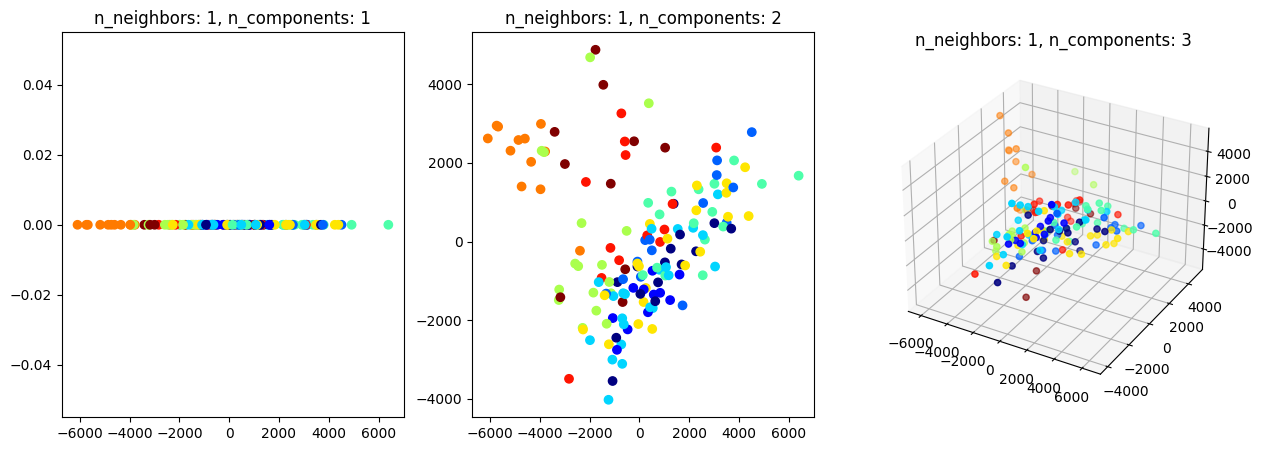

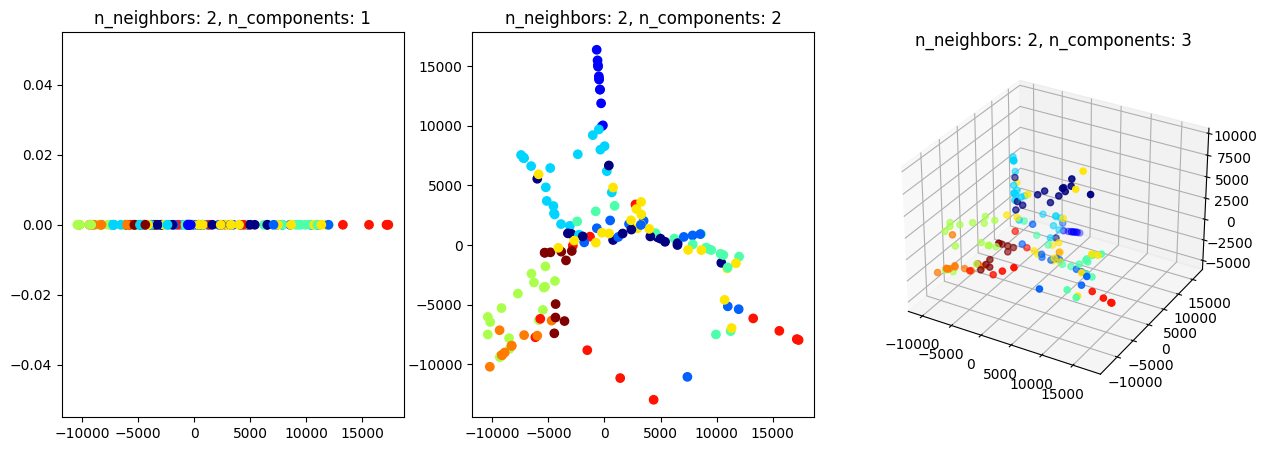

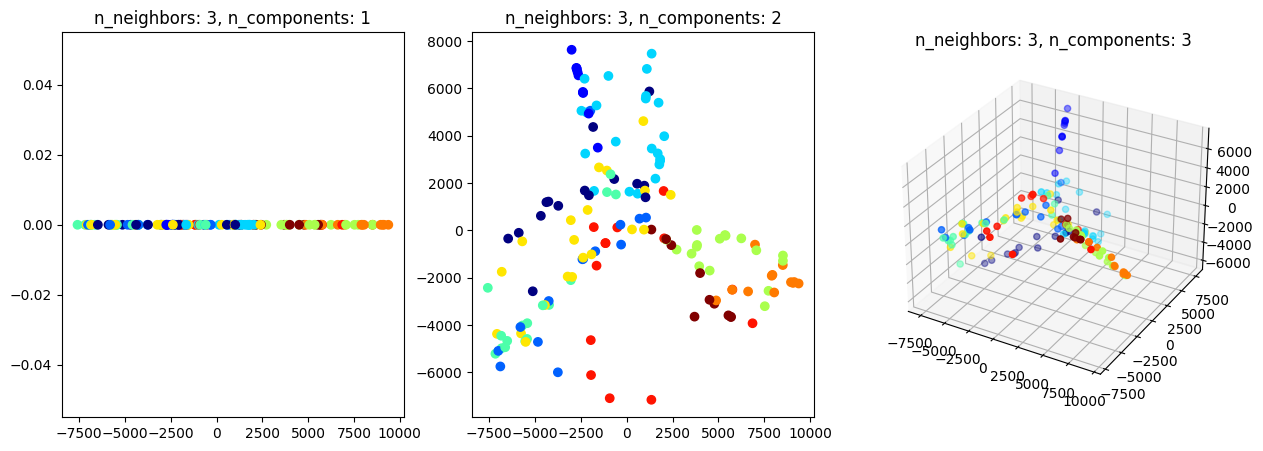

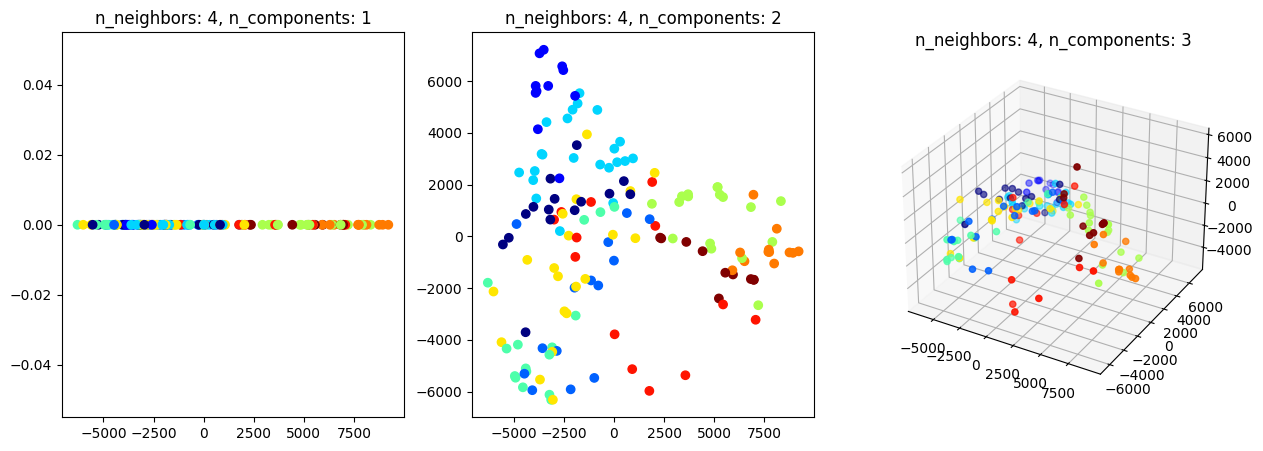

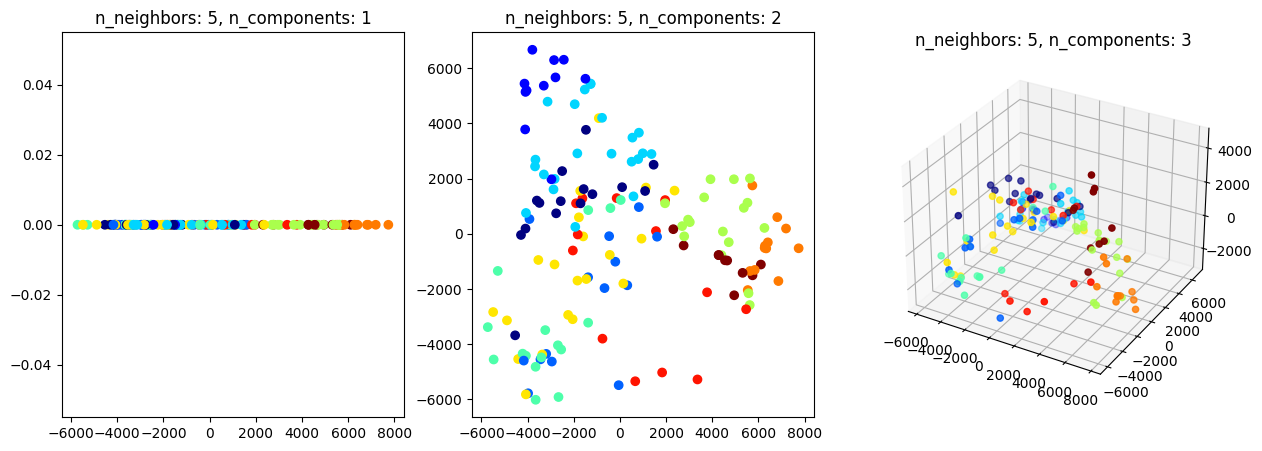

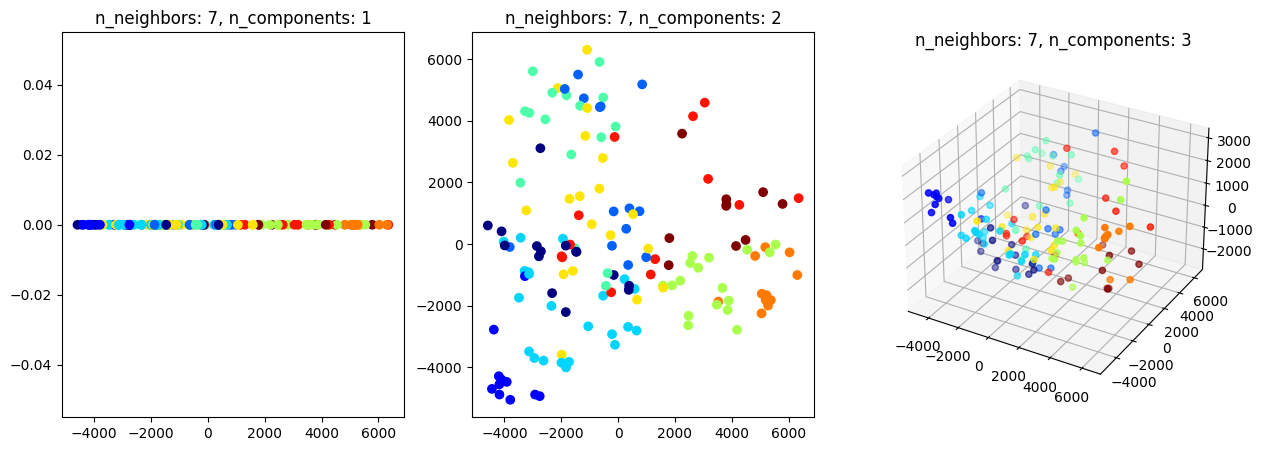

In [19]:
transformed_isomap_data_list = []

for n_neighbors_val in n_neighbors_values:
    plt.figure(figsize=(15, 5))
    for i, n_components_val in enumerate(n_components_values):
        
        # Isomap
        isomap = Isomap(n_neighbors=n_neighbors_val, n_components=n_components_val)
        transformed_isomap_data = isomap.fit_transform(subset_train)
        transformed_isomap_data_list.append((n_neighbors_val, n_components_val, transformed_isomap_data))
        
        if n_components_val == 1:
            ax = plt.subplot(1, len(n_components_values), i + 1)
            plt.scatter(transformed_isomap_data, np.zeros_like(transformed_isomap_data), c=subset_train_labels, cmap='jet')
        elif n_components_val == 2:
            ax = plt.subplot(1, len(n_components_values), i + 1)
            plt.scatter(transformed_isomap_data[:, 0], transformed_isomap_data[:, 1], c=subset_train_labels, cmap='jet')
        elif n_components_val == 3:
            ax = plt.subplot(1, len(n_components_values), i + 1, projection='3d')  # 3D subplot
            ax.scatter(transformed_isomap_data[:, 0], transformed_isomap_data[:, 1], transformed_isomap_data[:, 2], c=subset_train_labels, cmap='jet')
        
        plt.title(f'n_neighbors: {n_neighbors_val}, n_components: {n_components_val}')
        
    plt.show()